# Modelling Strategie
We looking for solve a classification problem like:\
*What range a goal would belongs ?*
- Target = **class**
- Features = **goal averages for team at home and away (scored / conceded)**
- Model = **Random Forest Classifier**

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random

In [102]:
path = Path.cwd().parent.parent / 'data' / '2022_23' / 'results' / 'ligue1.csv'
df = pd.read_csv(path, parse_dates=True, index_col='date_time')
df.head()

,journée,home_team,away_team,1st_home_team_goal,1st_away_team_goal,1st_total_goal,2nd_home_team_goal,2nd_away_team_goal,2nd_total_goal,total_home_team_goal,total_away_team_goal,global
date_time,,,,,,,,,,,,
2023-06-03 19:00:00,38,AC Ajaccio,Marseille,0,0,0,1,0,1,1,0,1
2023-06-03 19:00:00,38,Nice,Lyon,3,1,4,0,0,0,3,1,4
2023-06-03 19:00:00,38,Troyes,Lille,0,0,0,1,1,2,1,1,2
2023-06-03 19:00:00,38,Reims,Montpellier,1,0,1,0,3,3,1,3,4
2023-06-03 19:00:00,38,PSG,Clermont,2,2,4,0,1,1,2,3,5


In [103]:
df.drop(['1st_home_team_goal', '1st_away_team_goal', '1st_total_goal',
         '2nd_home_team_goal', '2nd_away_team_goal', '2nd_total_goal'], axis=1, inplace=True)

### Feature Engineering
We gonna create new features to try a first modelling strategie
for what we understood of the Exploratory Data Analysis...\
For team at home and away team, we'll have variable like:
- the average of goal scored before the match
- the average of goal conceded before the match

In [104]:
def avg_per_match():
    """This function will calculate for each team
    the average of goal scored and conceded after each match
    """
    data = df.copy()
    data = data.sort_values(by='journée', ascending=True)
    for row in data.iterrows():
        at_home = data[data['home_team']==data['home_team']]
        at_away = data[data['away_team']==data['away_team']]
        data['ht_scored_avg'] = at_home.groupby('home_team')['total_home_team_goal'].transform(lambda x: x.expanding().mean().shift())
        data['ht_conceded_avg'] = at_home.groupby('home_team')['total_away_team_goal'].transform(lambda x: x.expanding().mean().shift())
        data['at_scored_avg'] = at_away.groupby('away_team')['total_away_team_goal'].transform(lambda x: x.expanding().mean().shift())
        data['at_conceded_avg'] = at_home.groupby('away_team')['total_home_team_goal'].transform(lambda x: x.expanding().mean().shift())
    return data

In [106]:
data = avg_per_match()
data.head(30)

,journée,home_team,away_team,total_home_team_goal,total_away_team_goal,global,ht_scored_avg,ht_conceded_avg,at_scored_avg,at_conceded_avg
date_time,,,,,,,,,,
2022-08-05 19:00:00,1,Lyon,AC Ajaccio,2,1,3,NaN,NaN,NaN,NaN
2022-08-07 18:45:00,1,Marseille,Reims,4,1,5,NaN,NaN,NaN,NaN
2022-08-07 15:05:00,1,Rennes,Lorient,0,1,1,NaN,NaN,NaN,NaN
2022-08-07 13:00:00,1,Lille,Auxerre,4,1,5,NaN,NaN,NaN,NaN
2022-08-07 13:00:00,1,Angers,Nantes,0,0,0,NaN,NaN,NaN,NaN
2022-08-06 15:00:00,1,Strasbourg,Monaco,1,2,3,NaN,NaN,NaN,NaN
2022-08-07 13:00:00,1,Lens,Brest,3,2,5,NaN,NaN,NaN,NaN
2022-08-07 11:00:00,1,Toulouse,Nice,1,1,2,NaN,NaN,NaN,NaN
2022-08-06 19:00:00,1,Clermont,PSG,0,5,5,NaN,NaN,NaN,NaN


In [107]:
# We started to drop the Nan column and irreliable ones.
dataset = data[data['journée']>2]
dataset = dataset.iloc[:, 5:]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 360 entries, 2022-08-21 18:45:00 to 2023-06-03 19:00:00
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   global           360 non-null    int64  
 1   ht_scored_avg    360 non-null    float64
 2   ht_conceded_avg  360 non-null    float64
 3   at_scored_avg    360 non-null    float64
 4   at_conceded_avg  360 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 16.9 KB


In [108]:
labels_names = ['under 2.5', 'over 2.5']
dataset['class'] = pd.cut(x=dataset['global'], bins=[min(dataset['global']), 2, max(dataset['global'])],
                          labels=labels_names, include_lowest=True)

### Modelling

In [88]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [109]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 360 entries, 2022-08-21 18:45:00 to 2023-06-03 19:00:00
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   global           360 non-null    int64   
 1   ht_scored_avg    360 non-null    float64 
 2   ht_conceded_avg  360 non-null    float64 
 3   at_scored_avg    360 non-null    float64 
 4   at_conceded_avg  360 non-null    float64 
 5   class            360 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 17.3 KB


In [110]:
code = {
        'under 2.5':0,
        'over 2.5':1
}
dataset['class'] = dataset['class'].map(code)

In [111]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 360 entries, 2022-08-21 18:45:00 to 2023-06-03 19:00:00
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   global           360 non-null    int64   
 1   ht_scored_avg    360 non-null    float64 
 2   ht_conceded_avg  360 non-null    float64 
 3   at_scored_avg    360 non-null    float64 
 4   at_conceded_avg  360 non-null    float64 
 5   class            360 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 17.3 KB


In [112]:
X = dataset.drop(['class', 'global'], axis=1)
y = dataset['class']

In [113]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=22)
params = [
    {'n_estimators':range(1, 20),
     'max_depth': range(1,20)}
]
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=2),
                    param_grid=params,
                    scoring='accuracy',
                    cv=5)
grid.fit(x_train, y_train)
print(grid.best_score_)

0.5714285714285714


In [114]:
print(grid.best_estimator_)

RandomForestClassifier(max_depth=2, n_estimators=11, random_state=2)


In [115]:
model = grid.best_estimator_
print(f"score {model.__class__.__name__}: {model.score(x_test, y_test)}")
print(confusion_matrix(y_test, model.predict(x_test)))

score RandomForestClassifier: 0.5451388888888888
[[76 46]
 [85 81]]


In [116]:
N, train_score, val_score = learning_curve(
    model, x_train, y_train, train_sizes= np.linspace(0.1, 1.0, 10), cv=5
)

[ 5 11 17 22 28 34 39 45 51 57]


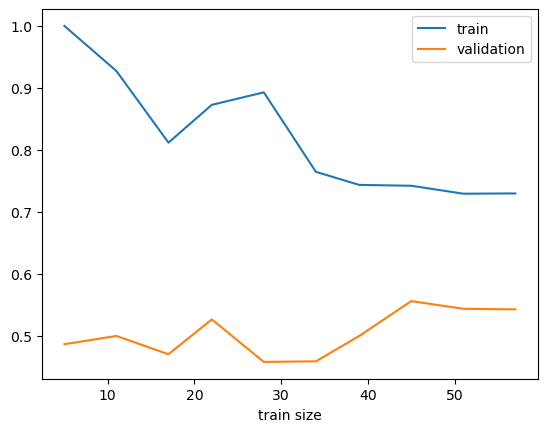

In [117]:
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train size')
plt.legend()